# Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as svn
%matplotlib inline

# Loading dataset

In [13]:
data =pd.DataFrame(pd.read_csv('COVID_pos.csv', index_col= 0))

In [14]:
df = data.copy()

In [15]:
df.head()

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2,2,0,0,0,0,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,4,0,1,0,0,0,0,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2,0,0,0,0,0,0,...,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,3,3,0,0,0,1,1,0,...,5.0,3.0,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 382
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       281 non-null    int64  
 1   COVID            281 non-null    int64  
 2   Age_cat          281 non-null    int64  
 3   BMI_cat          281 non-null    int64  
 4   HEART            281 non-null    int64  
 5   LUNG             281 non-null    int64  
 6   KIDNEY           281 non-null    int64  
 7   DIABETES         281 non-null    int64  
 8   HTN              281 non-null    int64  
 9   IMMUNO           281 non-null    int64  
 10  Resp_Symp        281 non-null    int64  
 11  Fever_Sympt      281 non-null    int64  
 12  GI_Symp          281 non-null    int64  
 13  D0_draw          281 non-null    float64
 14  D3_draw          281 non-null    float64
 15  D7_draw          281 non-null    float64
 16  DE_draw          281 non-null    float64
 17  Acuity_0        

In [17]:
cols = df[['Acuity_0','Acuity_3','Acuity_7','Acuity_28']]
cols

,Acuity_0,Acuity_3,Acuity_7,Acuity_28
0,3,4,5,5
1,3,3,5,5
2,3,3,5,5
3,3,3,5,5
4,3,3,3,5
...,...,...,...,...
376,3,3,3,5
377,2,2,2,5
379,4,2,2,2
380,2,2,2,2


# Exploratory Data Analysis

**Since I want to know which factors could be used for prognosis prediction when subjects arrived at the hospital, variables at day 0 were studied first**

### What factors are might be important to 

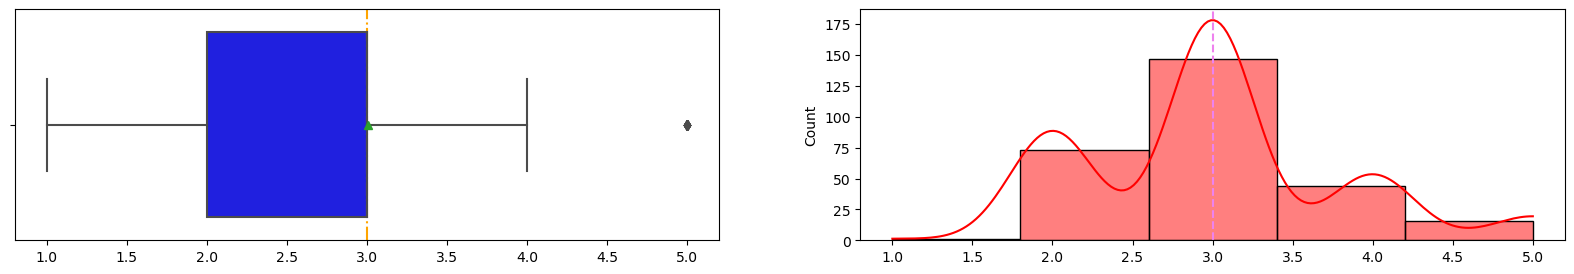

In [18]:
his_boxplot(data, 'Acuity_0', kde = True, bins=5)

**Most of the subjects have intermediate symtoms when they were accepted in the hospital**

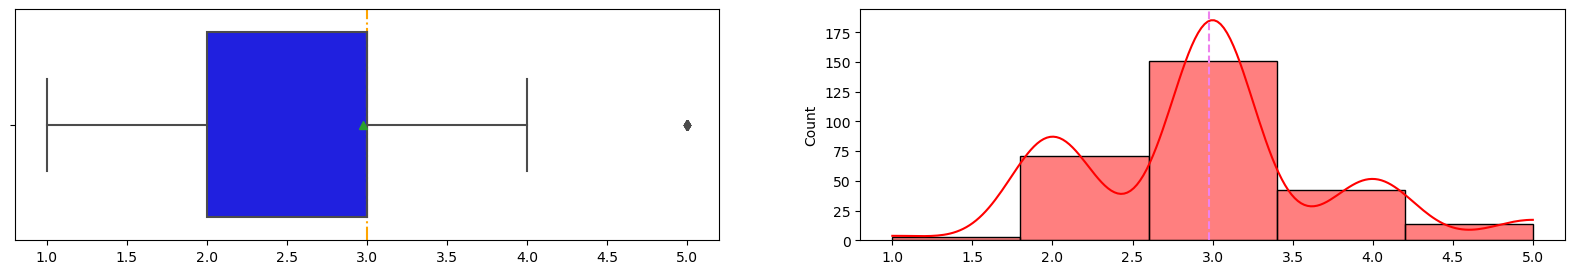

In [19]:
his_boxplot(data, 'abs_neut_0_cat', kde = True, bins=5)

**Most of the subjects present an interval levels of neutrophils: 4.0-7.99 4 units**

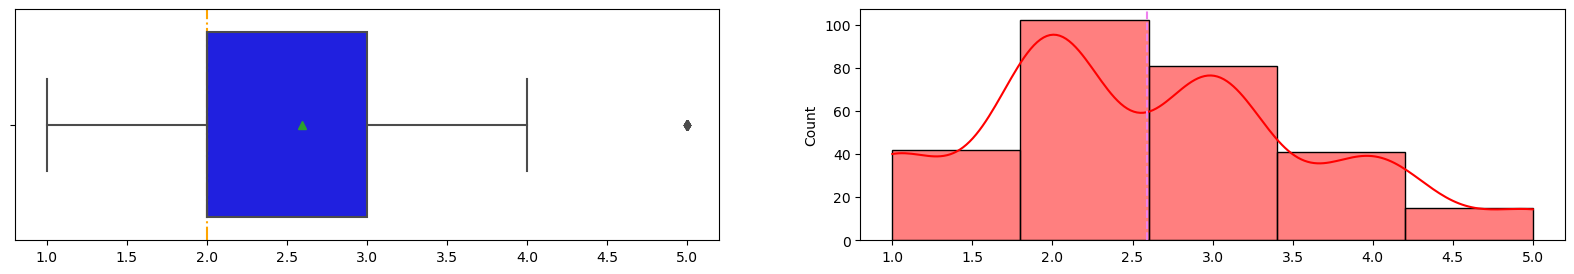

In [20]:
his_boxplot(data, 'abs_lymph_0_cat', kde = True, bins=5)

**Most of the subjects present an interval levels of lymphocytes: 1.00-1.49 units**

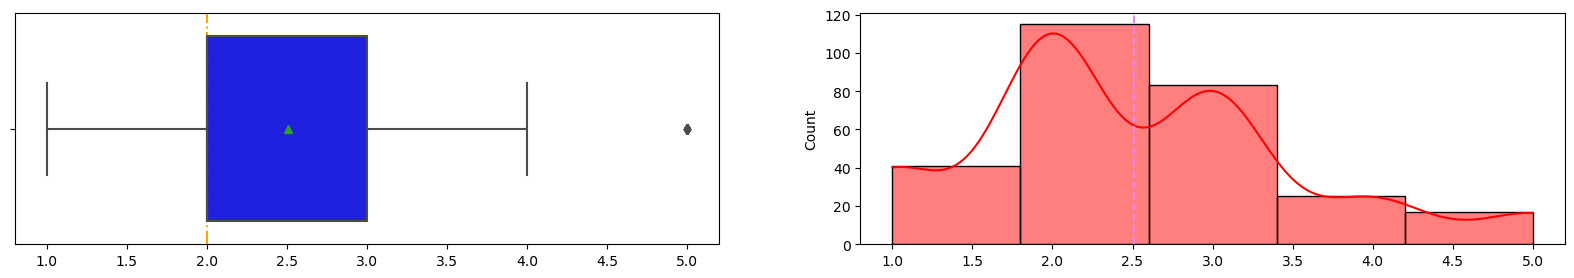

In [21]:
his_boxplot(data, 'abs_mono_0_cat', kde = True, bins=5)

**The distribution curve of monocyte antibodies were right-skewered of subjects when they arrive, indicating most of the individuals present low levels of this abs**

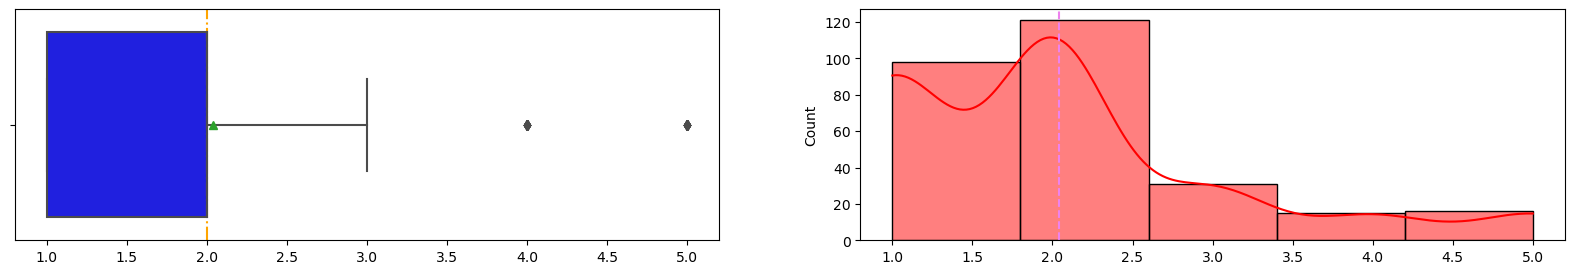

In [22]:
his_boxplot(data, 'creat_0_cat', kde = True, bins=5)

**The creatine levels were very low for mos to the patients**

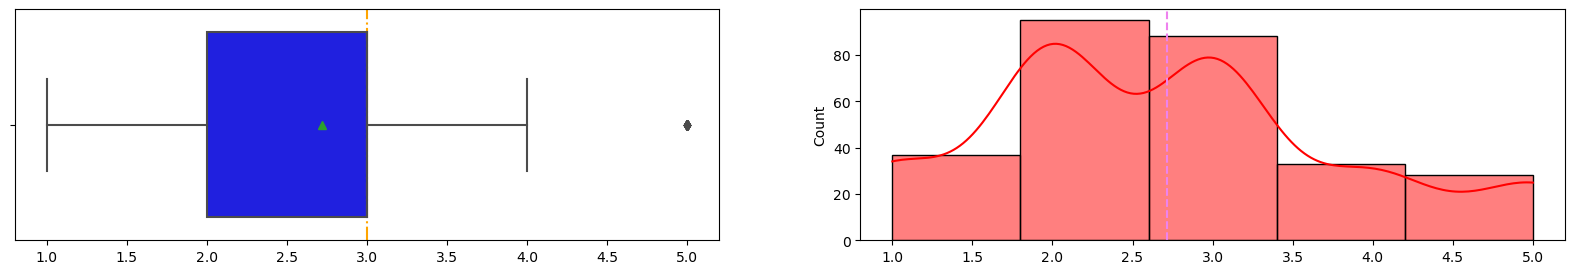

In [23]:
his_boxplot(data, 'ddimer_0_cat', kde = True, bins=5)

**The levels of ddimer were between low and normal in most of the subjects at day 0**

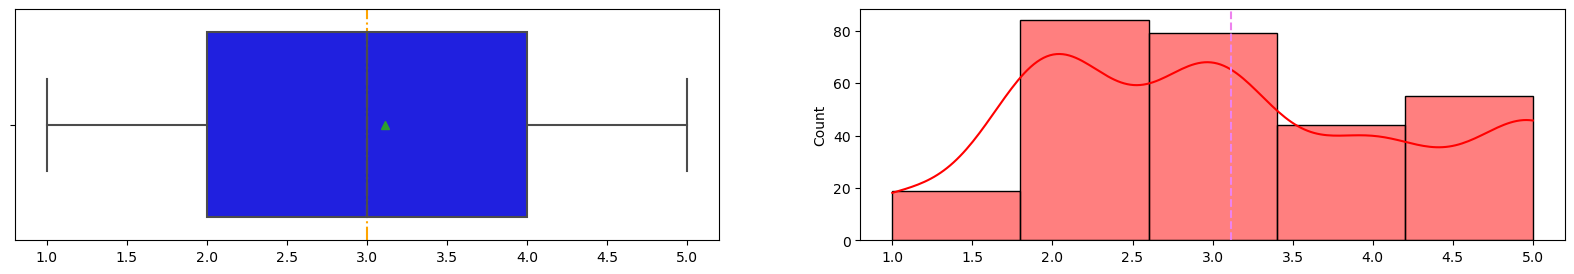

In [24]:
his_boxplot(data, 'ldh_0_cat', kde = True, bins=5)

**The levels of lactate were between low and normal in most of the subjects at day 0**

# Multivariate Analysis

**How much time the patients spend at the hospital is important to understand how the evolution of their symtoms are how likely they evolve throughout after covid infection**

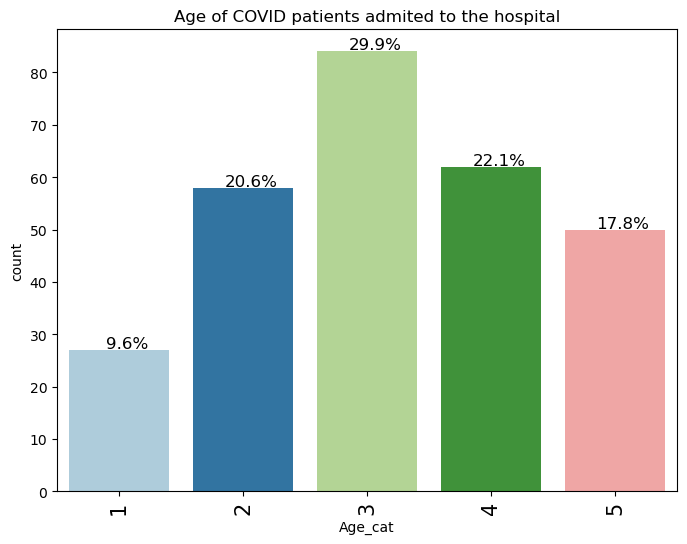

In [25]:
barplot(data, 'Age_cat', perc = True, title_graph='Age of COVID patients admited to the hospital' , n = 6)

**Subjects that did not need care of hospitalization were scored with 5 in the Acuity variable until the last day of the study, therefore to classify subjects with good (4-5) or poor (1-3) prognosis it is imporant to consider how is the rate at day 28.**

**Age is a factor that follows a normal distribution where most of the subjects are between 50-64 years old**

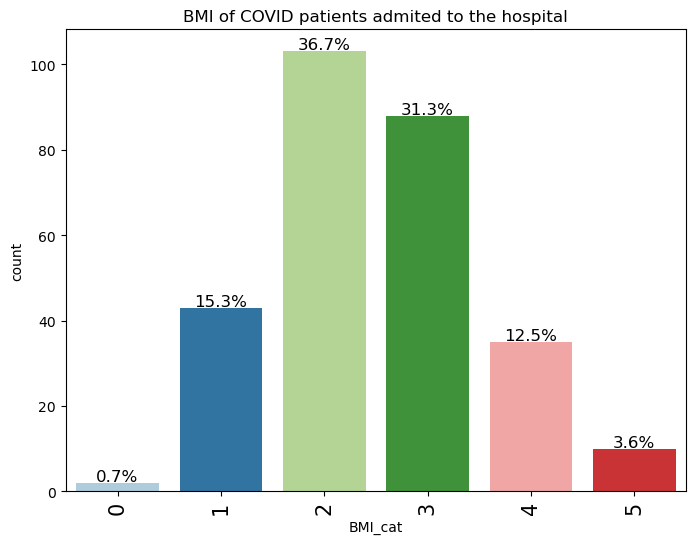

In [26]:
barplot(data, 'BMI_cat', perc = True, title_graph='BMI of COVID patients admited to the hospital' , n = 6)

**Around 70% of the subjects admited at the hospital because COVID, are overweight.**

/Users/alexsevman/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


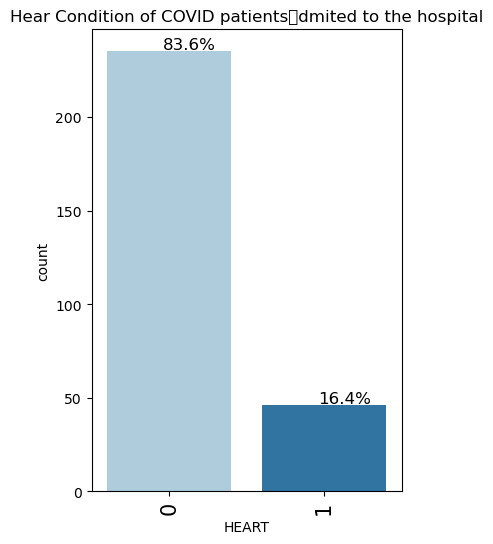

In [27]:
barplot(data, 'HEART', perc = True, title_graph='Hear Condition of COVID patients\admited to the hospital')

**Heart condition is only observed in the 16% of COVID postiive patients**

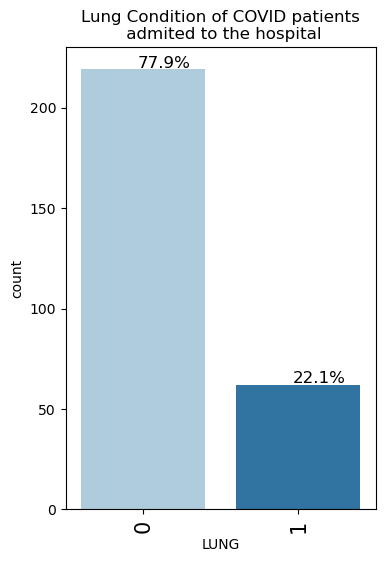

In [28]:
barplot(data, 'LUNG', perc = True, title_graph='Lung Condition of COVID patients\n admited to the hospital' ,)

**Lung condition is observed in the 22% of COVID postiive patients**

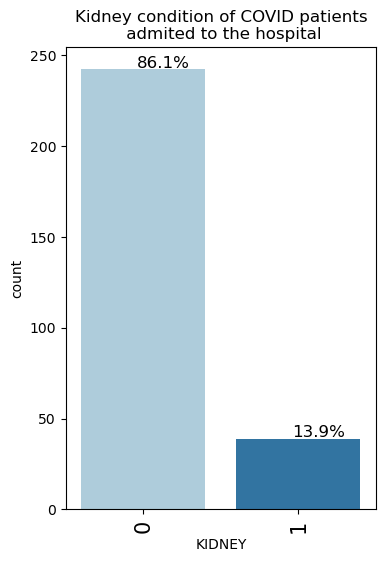

In [29]:
barplot(data, 'KIDNEY', perc = True, title_graph='Kidney condition of COVID patients\n admited to the hospital')

**Kidney condition is only observed in the 14% of COVID postiive patients**

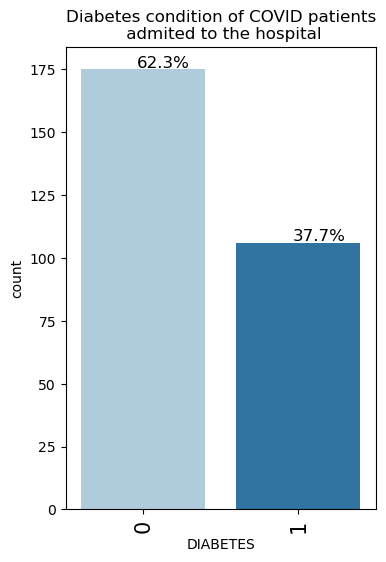

In [30]:
barplot(data, 'DIABETES', perc = True, title_graph='Diabetes condition of COVID patients\n admited to the hospital')

**Around 40% of COVID positive patients admited at the hospital were also affected by DIABETES**

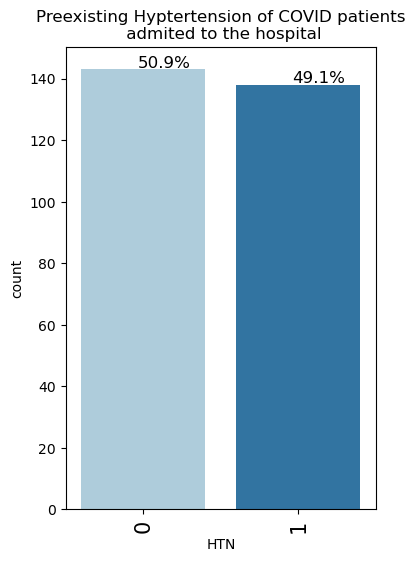

In [31]:
barplot(data, 'HTN', perc = True, title_graph='Preexisting Hyptertension of COVID patients\n admited to the hospital')

**Hypertension seems to be an important factor observed in COVID positive subjects** 

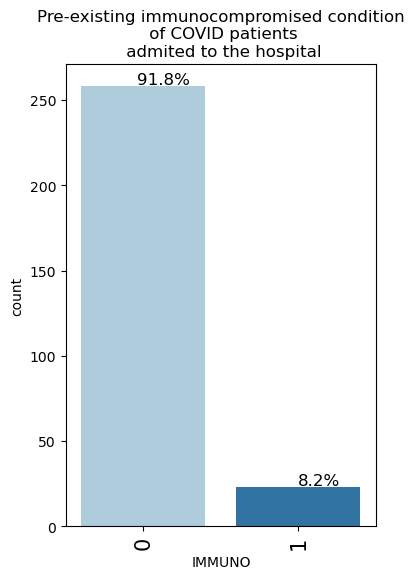

In [32]:
barplot(data, 'IMMUNO', perc = True, title_graph='Pre-existing immunocompromised condition\n of COVID patients\n admited to the hospital')

**Very few subjects have any historoy of immunesupression**

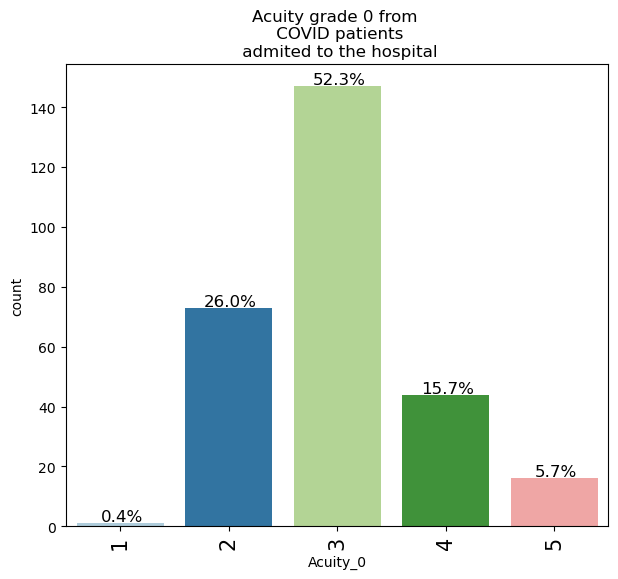

In [33]:
barplot(data, 'Acuity_0', perc = True, title_graph='Acuity grade 0 from \n COVID patients\n admited to the hospital')

**Very few patients were diagnosed with severe covid when they were accepted, however most of them needed oxygen or were intubated**

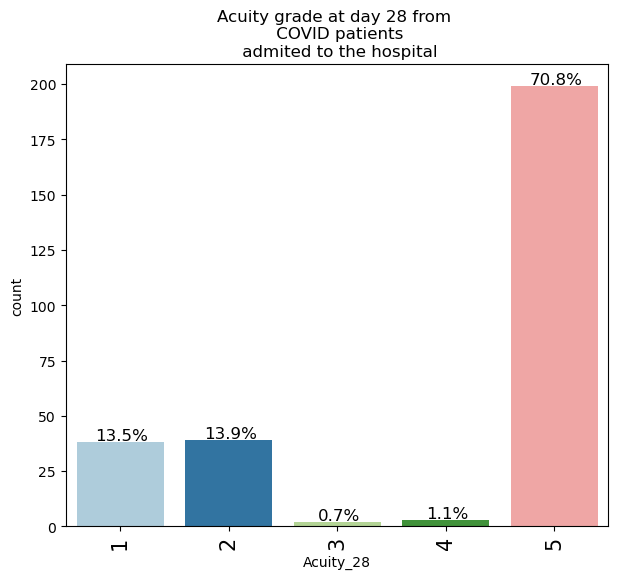

In [34]:
barplot(data, 'Acuity_28', perc = True, title_graph='Acuity grade at day 28 from \n COVID patients\n admited to the hospital')

**After 28 days at the hospital, most of the patients were discharged, however a significant increased is observed in subjects with severe COVID**

## Feature engineering

In [35]:
data.loc[data["D0_draw"] == 1, "Day_Draw"] = 1
data.loc[data["D3_draw"] == 1, "Day_Draw"] = 3
data.loc[data["D7_draw"] == 1, "Day_Draw"] = 7

In [36]:
htn_grades_0 = df.groupby(['HTN','Acuity_0']).size().reset_index(name='counts')

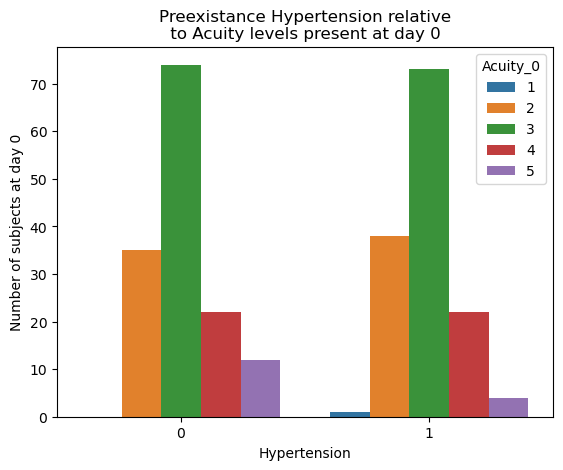

In [37]:
g = sns.barplot(data=htn_grades_0,
            y = 'counts',
            x='HTN',
            hue = 'Acuity_0'
           );
plt.xlabel('Hypertension')
plt.ylabel('Number of subjects at day 0')
plt.title('Preexistance Hypertension relative\n to Acuity levels present at day 0 ');

In [38]:
diabetes_grades_0 = df.groupby(['DIABETES','Acuity_0']).size().reset_index(name='counts')

**Although almost half of the people that arrived at the hospital presented hypertension, there is no significant difference between the severance of the symptoms in both groups**

''

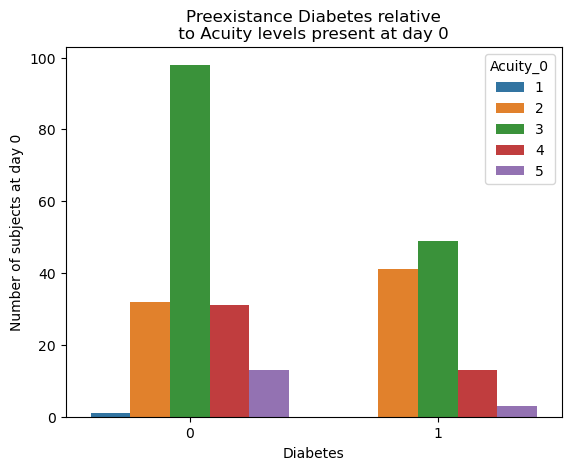

In [39]:
sns.barplot(data=diabetes_grades_0,
            y = 'counts',
            x='DIABETES',
            hue = 'Acuity_0'
           )
plt.xlabel('Diabetes')
plt.ylabel('Number of subjects at day 0')
plt.title('Preexistance Diabetes relative\n to Acuity levels present at day 0 ');
;

**People that has diabetes are more likely to present severe symtoms as observed at the first day at the hospital**

In [40]:
lung_grades_0 = df.groupby(['LUNG','Acuity_0']).size().reset_index(name='counts')

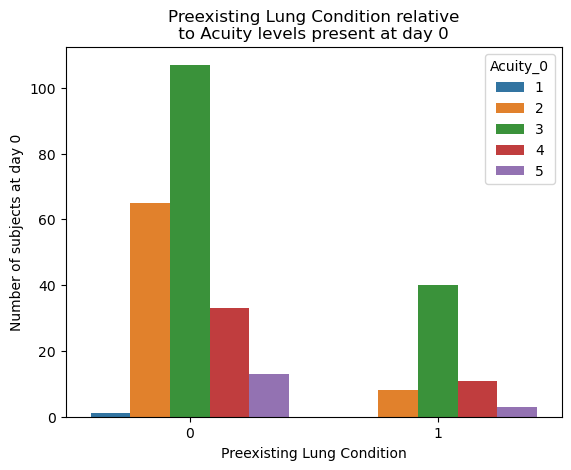

In [41]:
sns.barplot(data=lung_grades_0,
            y = 'counts',
            x='LUNG',
            hue = 'Acuity_0'
           )
plt.xlabel('Preexisting Lung Condition')
plt.ylabel('Number of subjects at day 0')
plt.title('Preexisting Lung Condition relative\n to Acuity levels present at day 0 ');

**Most of the subjects are more likely to need oxygen when they arrive at the hospital, regardless a preexistance of Lung condition**

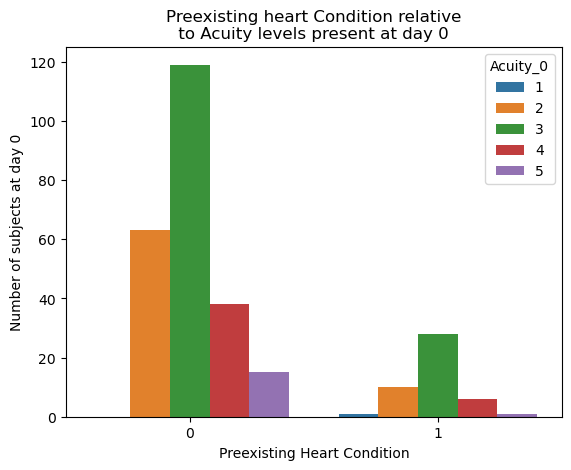

In [42]:
heart_grades_0 = df.groupby(['HEART','Acuity_0']).size().reset_index(name='counts')
sns.barplot(data=heart_grades_0,
            y = 'counts',
            x='HEART',
            hue = 'Acuity_0'
           )
plt.xlabel('Preexisting Heart Condition')
plt.ylabel('Number of subjects at day 0')
plt.title('Preexisting heart Condition relative\n to Acuity levels present at day 0 ');

In [43]:
age_car = df.groupby(['Age_cat','Acuity_0']).size().reset_index(name='counts')

In [44]:
barplot_sns(age_car, 'Age_cat', title_graph=True, perc = None)

NameError: name 'barplot_sns' is not defined

In [ ]:
abs_neut_0_cat_grades = df.groupby(['abs_neut_0_cat','Acuity_0']).size().reset_index(name='counts')

The levels of abs_neut_0_cat at day 0 
 depending on symptoms grade


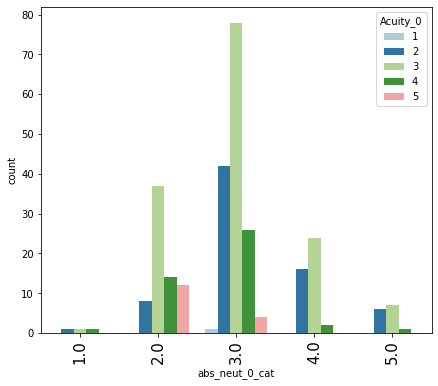

In [ ]:
barplot_sns(abs_neut_0_cat_grades,'abs_neut_0_cat', perc = None, title_graph = True)

**The highest neutrophile leveles are from subjects with mild symtoms that need oxygen**

In [ ]:
lymph_grades_0 = df.groupby(['abs_lymph_0_cat','Acuity_0']).size().reset_index(name='counts')

The levels of abs_lymph_0_cat at day 0 
 depending on symptoms grade


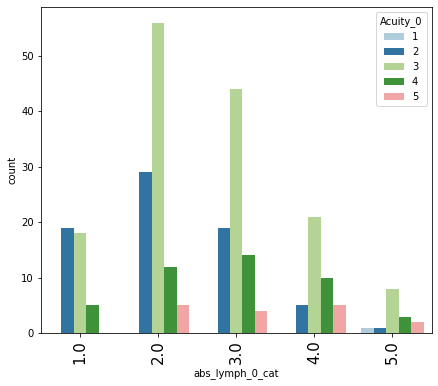

In [ ]:
barplot_sns(lymph_grades_0, 'abs_lymph_0_cat', title_graph=True, perc = None)

**Although most of the subjects showed low levels of lyphocytes, people with mild symtoms present higher levels than the rest of the individuals**

In [ ]:
mono_grades_0 = df.groupby(['abs_mono_0_cat','Acuity_0']).size().reset_index(name='counts')

The levels of abs_mono_0_cat at day 0 
 depending on symptoms grade


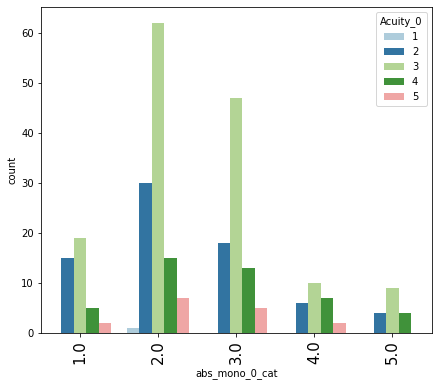

In [ ]:
barplot_sns(mono_grades_0, 'abs_mono_0_cat', title_graph=True, perc = None)

In [ ]:
creat_grades_0 = df.groupby(['creat_0_cat','Acuity_0']).size().reset_index(name='counts')

The levels of creat_0_cat at day 0 
 depending on symptoms grade


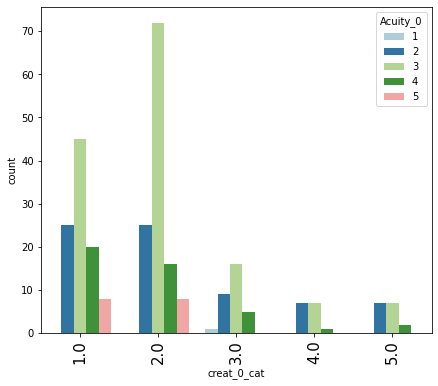

In [ ]:
barplot_sns(creat_grades_0,'creat_0_cat', perc = None, title_graph=True)

In [ ]:
crp_grades_0 = df.groupby(['crp_0_cat','Acuity_0']).size().reset_index(name='counts')

The levels of crp_0_cat at day 0 
 depending on symptoms grade


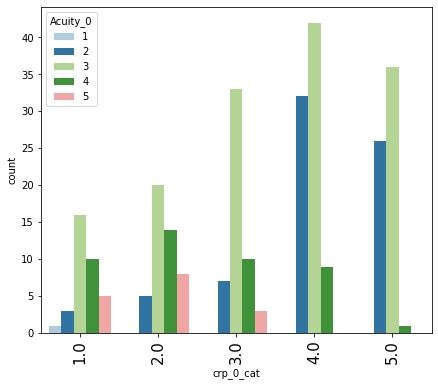

In [ ]:
barplot_sns(crp_grades_0, 'crp_0_cat', title_graph=True, perc = None)

**subjects with mild covid symptoms harbors more c-reactive protein. As shown in this graph, the cr protein is highly expressed in either people that were intubated and in needs of oxygen**

In [ ]:
ddimer_grades_0 = df.groupby(['ddimer_0_cat','Acuity_0']).size().reset_index(name='counts')

The levels of ddimer_0_cat at day 0 
 depending on symptoms grade


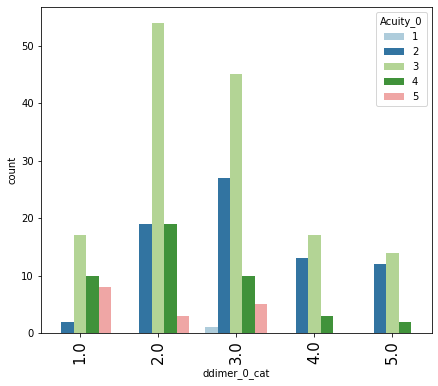

In [ ]:
barplot_sns(ddimer_grades_0, 'ddimer_0_cat', title_graph=True, perc= None)

In [ ]:
ldh_grades_0 = df.groupby(['ldh_0_cat','Acuity_0']).size().reset_index(name='counts')

The levels of ldh_0_cat at day 0 
 depending on symptoms grade


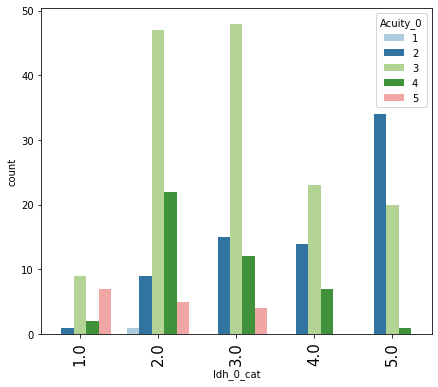

In [ ]:
barplot_sns(ldh_grades_0, 'ldh_0_cat', title_graph=True, perc=None)

In [ ]:
Trop_grades_0 = df.groupby(['Trop_72h','Acuity_0']).size().reset_index(name='counts')

The levels of Trop_72h at day 0 
 depending on symptoms grade


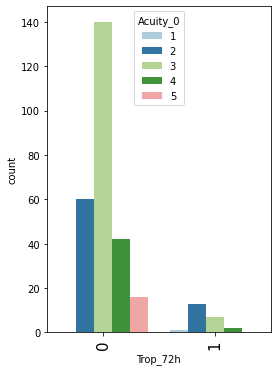

In [ ]:
barplot_sns(Trop_grades_0, 'Trop_72h', title_graph=True, perc = None,)

**It is very unlikly to have a cardiac event during the first 72h and if so, it is associated with severe symtoms**

In [ ]:
data['Prognosis']=prognosis

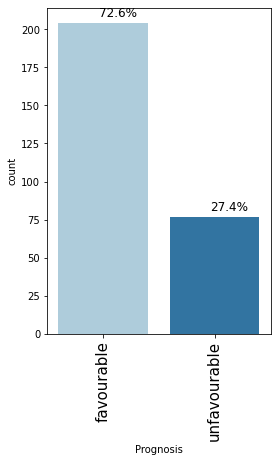

In [ ]:
barplot(data, 'Prognosis', perc = True)

**Around 30% of the individuals that were admited in the hospital at day 0 has a unfavoulable outcome after 28 days hospitalized**

# Insights and recomendations

**- Most of the immune markers were low at day 0. Only subjects with mild symptoms (rate 3) present higher levels of antibodies.**\
**- People over 50 are more likely to present a poor outcome.**\
**- within all preexisting conditions, hypertension and diabetes are shown in mild - severe symtoms.**\
**- Although Monocytes, lymphocytes are two markers observed at lower levels, they are significantly expressed in subjects with severe and mild sympo.**\
**- Subjects with severe and mild covid symptoms harbors more c-reactive protein. Similarly, Lactato dh are highly expressed in subjects with severe symtoms.**\
**- Around 30% of the individuals that were admited in the hospital at day 0 has a unfavoulable outcome after 28 days hospitalized**


**To predict the outcome for covid patients, it is selected all variables mentioned above**

In [ ]:
df = data[['subject_id', 'Prognosis','Age_cat','BMI_cat','HEART','LUNG','KIDNEY',
           'DIABETES','HTN','IMMUNO','Resp_Symp','Fever_Sympt','GI_Symp','Acuity_0',
           'Acuity_3','Acuity_7','Acuity_28','abs_neut_0_cat','abs_lymph_0_cat',
           'abs_mono_0_cat','creat_0_cat','crp_0_cat','ddimer_0_cat','ldh_0_cat',
           'Trop_72h']]

In [ ]:
df.to_csv('clinial_EDA.csv')

# Annex

**Definition of function for graphs**

In [ ]:
prognosis = []
for n in df['Acuity_28']:
    if n <=2:
        prognosis.append('Unfavourable')
    elif n == 3:
        prognosis.append('Indeterminate')
    else:
        prognosis.append('Favourable')


In [ ]:
df['prognosis']=prognosis

In [ ]:
df

,subject_id,COVID,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,prognosis
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable
1,2,1,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable
2,3,1,3,4,0,1,0,0,0,0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable
3,4,1,1,2,0,0,0,0,0,0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favourable
4,5,1,3,3,0,0,0,1,1,0,...,3.0,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,379,1,3,3,0,0,0,0,0,0,...,4.0,4.0,2.0,5.0,2.0,2.0,1.0,5.0,5.0,Favourable
377,380,1,3,2,0,0,0,0,0,0,...,NaN,NaN,4.0,3.0,5.0,1.0,NaN,NaN,NaN,Favourable
379,382,1,1,3,0,0,0,0,0,0,...,3.0,3.0,3.0,1.0,1.0,1.0,5.0,3.0,2.0,Unfavourable
380,383,1,5,1,0,0,1,1,1,0,...,5.0,3.0,5.0,2.0,2.0,3.0,NaN,NaN,NaN,Unfavourable


In [ ]:
def barplot_sns(data, feature, target ,perc = True, n = None, title_graph = None, title_legend = None):
    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count +5, 6))
    else:
        plt.figure(figsize=(n +5, 6))
    plt.xticks(rotation = 45, fontsize = 12)
    title_graph = plt.title(f'The levels of:{target} at day 0 \n depending on symptoms grade', fontsize = 25)


    ax = sns.countplot(
        data = data, 
        x = feature, 
        hue = target, 
        palette = "rocket",
        edgecolor=sns.color_palette("dark"),
        linewidth=2,
        order=data[feature].value_counts().index[:n]
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        elif perc==False:
            label = p.get_height()
        else:
            label = None

        x = p.get_x() + p.get_width()
        y = p.get_height()
        
        ax.annotate(
            label, 
            (x, y),
            ha = 'center',
            va = 'top',
            size = 10, 
            xytext = (-15, 20),
            textcoords = 'offset points'
        )
        sns.move_legend(ax, "lower center", bbox_to_anchor=(.8, .8), ncol=3, title=title_legend, frameon=False)
        plt.show()

In [ ]:
plt.annotate?

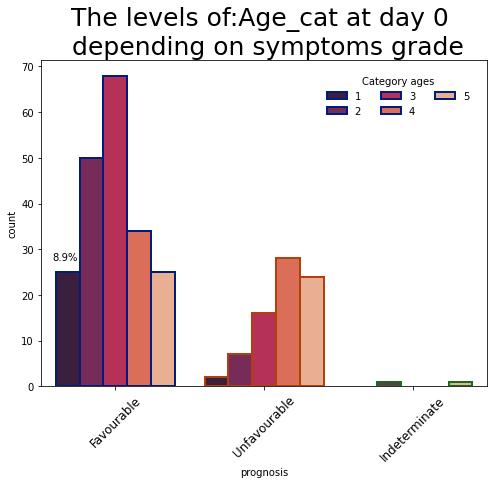

In [ ]:
barplot_sns(df, 'prognosis','Age_cat', title_graph='bla bla', title_legend='Category ages')

In [ ]:
sns.countplot?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 382
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       281 non-null    int64  
 1   COVID            281 non-null    int64  
 2   Age_cat          281 non-null    int64  
 3   BMI_cat          281 non-null    int64  
 4   HEART            281 non-null    int64  
 5   LUNG             281 non-null    int64  
 6   KIDNEY           281 non-null    int64  
 7   DIABETES         281 non-null    int64  
 8   HTN              281 non-null    int64  
 9   IMMUNO           281 non-null    int64  
 10  Resp_Symp        281 non-null    int64  
 11  Fever_Sympt      281 non-null    int64  
 12  GI_Symp          281 non-null    int64  
 13  D0_draw          281 non-null    float64
 14  D3_draw          281 non-null    float64
 15  D7_draw          281 non-null    float64
 16  DE_draw          281 non-null    float64
 17  Acuity_0        

In [ ]:
def barplot(data, feature, perc = False, n = None, title_graph = None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count +2, 6))
    else:
        plt.figure(figsize=(n +2, 6))
    plt.xticks(rotation = 90, fontsize = 15)
    plt.title(title_graph)
    ax = sns.countplot(
        data = data, 
        x = feature, 
        palette = 'Paired',
        #order=data[feature].value_counts().index[:n]
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()
            
        x = p.get_x() + p.get_width()
        y = p.get_height()
        
        ax.annotate(
            label, 
            (x, y),
            ha = 'center',
            va = 'top',
            size = 12, 
            xytext = (-30, 10),
            textcoords = 'offset points'
        )
    plt.show()

In [ ]:
# function for creating histograms and boxplot for univariate analysis of numerical variables
def his_boxplot(data, feature, figsize=(20, 3), kde=False, bins = None, title = None, x_label = None,):
    g, (ax_box, ax_hist) = plt.subplots(
        ncols=2, 
        sharex=True,
        #gridspec_kw={'height_ratios':(0.25, 0,75)},
        figsize = figsize,
    )
    plt.title(title)
    plt.xlabel(x_label)
    sns.histplot(
        data = data, x = feature,kde=True, color='red', ax=ax_hist, bins= bins
    ) #if bins else sns.histplot(data = data, x = feature,kde=kde, ax=ax_hist)

    sns.boxplot(data = data, x = feature, ax=ax_box, showmeans= True, color='blue')
    # For histagram: add a vertical line with mean
    ax_hist.axvline(
        data[feature].mean(), color='violet', linestyle = '--')
    ax_box.axvline(
        data[feature].median(), color='orange', linestyle = 'dashdot')
    ax_box.set_title(title, fontsize = 25)
    ax_hist.set_title(title, fontsize = 25)
    ax_hist.set(xlabel = x_label)
    ax_box.set(xlabel = x_label)